In [77]:
!pip install keras


In [78]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Dense,Input
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout
from keras import backend as k
import matplotlib.pyplot as plt

In [79]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [80]:
print('train data shape: ',x_train.shape,y_train.shape)
print('Test data shape: ',x_test.shape,y_test.shape)

train data shape:  (60000, 28, 28) (60000,)
Test data shape:  (10000, 28, 28) (10000,)


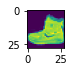

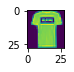

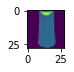

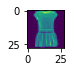

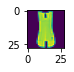

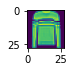

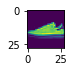

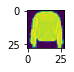

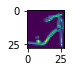

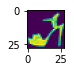

In [94]:
for i in range(10):
  plt.subplot(511)
  plt.imshow(x_train[i])
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[9 2 1 ... 8 1 5]


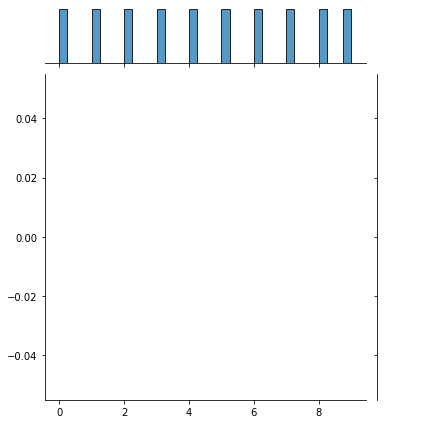

In [95]:
import seaborn as sns
sns.jointplot(y_train,data=fashion_mnist)
print(y_test)

In [83]:
n_rows,n_cols=28,28
if k.image_data_format()=='channels_first':
  x_train=x_train.reshape(x_train.shape[0],1,n_rows,n_cols)
  x_test=x_test.reshape(x_test.shape[0],1,n_rows,n_cols)
  inpx=(1,n_rows,n_cols)
else:
  x_train=x_train.reshape(x_train.shape[0],n_rows,n_cols)
  x_test=x_test.reshape(x_test.shape[0],n_rows,n_cols)
  inpx=(n_rows,n_cols,1)


In [84]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


In [85]:
x_train/=255
x_test/=255


In [86]:
import keras
y_train_cat=keras.utils.to_categorical(y_train)
y_test_cat=keras.utils.to_categorical(y_test)
print(y_train.shape)

(60000,)


In [87]:
inpx=Input(shape=inpx)
layer1=Conv2D(32,(3,3),activation='relu')(inpx)
layer2=Conv2D(32,(3,3),activation='relu')(layer1)
layer3=MaxPooling2D(pool_size=(2,2))(layer2)
layer4=Dropout(0.5)(layer3)
layer5=Flatten()(layer4)
layer6=Dense(150,activation='sigmoid')(layer5)
layer7=Dense(10,activation='softmax')(layer6)

In [88]:
model=Model([inpx],layer7)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
model.fit(x_train,y_train_cat,batch_size=50,epochs=5)

Epoch 1/5
1200/1200 [==============================] - 98s 81ms/step - loss: 0.6348 - accuracy: 0.7729
Epoch 2/5
1200/1200 [==============================] - 97s 81ms/step - loss: 0.3141 - accuracy: 0.8869
Epoch 3/5
1200/1200 [==============================] - 97s 81ms/step - loss: 0.2688 - accuracy: 0.9008
Epoch 4/5
1200/1200 [==============================] - 97s 81ms/step - loss: 0.2397 - accuracy: 0.9114
Epoch 5/5
1200/1200 [==============================] - 97s 81ms/step - loss: 0.2159 - accuracy: 0.9219


In [90]:
score=model.evaluate(x_test,y_test_cat,)
print('loss',score[0])
print('accuracy',score[1])

313/313 [==============================] - 5s 15ms/step - loss: 0.2296 - accuracy: 0.9150
loss 0.2296474128961563
accuracy 0.9150000214576721


In [91]:
prediction=model.predict(x_test)
print(np.argmax(np.round(prediction[2])))

1


9
9


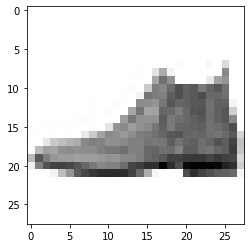

2
2


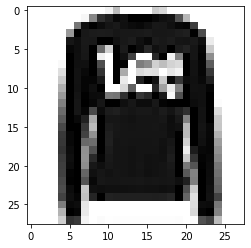

1
1


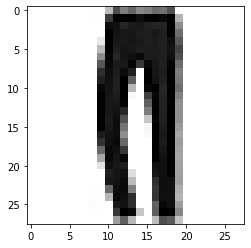

1
1


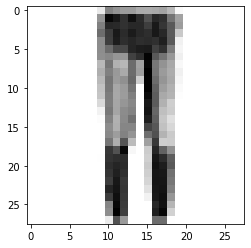

In [92]:
for i in range(4):
  plt.imshow(x_test[i].reshape(28,28),cmap=plt.cm.binary)
  print(np.argmax(np.round(prediction[i])))
  print(y_test[i])
  plt.show()